In [1]:
import pandas as pd
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib import pyplot as plt
import pickle
from underthesea import pos_tag, chunk, word_tokenize

In [2]:
def get_comment_data(file_name):
    """Get comments data, from local csv."""
    if (os.path.exists(file_name)):
        print("--"+file_name+" found locally")
        df = pd.read_csv(file_name)
    return df

In [3]:
#Đọc lấy dữ liệu
raw_data = get_comment_data('comment_data.csv')

--comment_data.csv found locally


In [23]:
#Kiểm tra dữ liệu mới lấy được
print("Data dimensions:", raw_data.shape)
print("List features:",raw_data.columns.values)
print("First review:",raw_data["comment"][0],"|",raw_data["sentiment"][0])

Data dimensions: (11796, 2)
List features: ['comment' 'sentiment']
First review:  Mới mua máy được 1 ngày, thấy mọi thứ vẫn ổn, pin sài đc lâu, camera chụp tốt. Màn hình nhạy, mọi thứ tốt. | 1


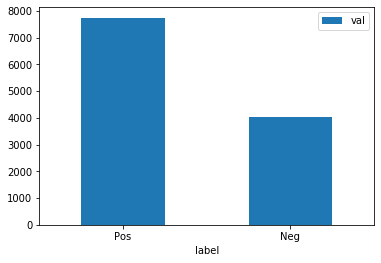

In [24]:
df = pd.DataFrame({'label':['Pos', 'Neg'], 'val':[raw_data["sentiment"].sum(), len(raw_data)-raw_data["sentiment"].sum()]})
ax = df.plot.bar(x='label', y='val', rot=0)

In [46]:
def get_stopwords(file_name):
    if (os.path.exists(file_name)):
        print("--"+file_name+" found lacally")
        f = open(file_name,encoding = "utf-8")
        stopwords = f.read()
        f.close()
    return stopwords

stopword = get_stopwords('stopwords.txt')
print('Succession!')

--stopwords.txt found lacally
Succession!


In [90]:
def comment_to_words(comment):
    """
    Function to convert a raw comment to a string of words
    :param comment
    :return: meaningful_words
    """
    #1. Convert to lower case
    sents = comment.lower() #Chuyển tất cả chữ về dạng chữ thường
    #2. Convert into meaningful_words
    words = []
    license = ['A','R']
    rew = ["không","chả","chẳng"]
    s = word_tokenize(sents,format='text').split(" ")
    for i in range(len(s)):
        if ('A' == pos_tag(s[i])[0][1] and s[i] not in words): #kiểm tra coi từ s[i] có phải là advj
                if (s[i] not in stopword):
                    words.append(s[i])
        elif (i<len(s)-1 and 'R' == pos_tag(s[i])[0][1] and 'A' == pos_tag(s[i+1])[0][1] and (s[i]+'_'+s[i+1]) not in words): #Kiểm tra coi có phải dạng reserword + adjv (ví dụ như không tốt, trong đó không có POS_tag là R và tốt là A)
                if (s[i]+' '+s[i+1]) not in stopword: 
                    words.append(s[i]+'_'+s[i+1])
    return ' '.join(words)
print("--Succession!")

--Succession!


In [91]:
#Xử lý comment đầu vào
print('--Coverting comment')
d = {'comment': [],'sentiment': []}
num_comment = raw_data["comment"].size

for i in range(num_comment):
    s = comment_to_words(raw_data["comment"][i])
    if s!='':
        d['comment'].append(s) #thêm câu nhận xét đã qua xử lý vào data
        d['sentiment'].append(raw_data['sentiment'][i]) #thêm nhãn cho điểm data đó
    if ((i+1)%1000==0):
        print('Finish '+str(i+1)+'st comment')
data = pd.DataFrame(data=d)
print("Succession!")
print("-"*30)

--Coverting comment
Finish 1000st comment
Finish 2000st comment
Finish 3000st comment
Finish 4000st comment
Finish 5000st comment
Finish 6000st comment
Finish 7000st comment
Finish 8000st comment
Finish 9000st comment
Finish 10000st comment
Finish 11000st comment
Succession!
------------------------------


In [92]:
data.head()

,comment,sentiment
0,vẫn_ổn,1
1,khá_êm,0
2,khá_nhiều,1
3,được_hơn rất_tốt,1
4,được_hơn quá_ngon ngon,1


In [93]:
print("--Creating bag of word matrix from data")
vector = CountVectorizer(ngram_range = (1,1)) #tạo một vector từ 
X = vector.fit_transform(data['comment']).toarray()
Y = [int(i) for i in data['sentiment']]
print("Sucession!")
print('-'*30)
print(vector.get_feature_names())

--Creating bag of word matrix from data
Sucession!
------------------------------
['buồn', 'bí', 'bầm', 'bẩn', 'bỏng', 'chuyên', 'chưa_cao', 'chưa_hư', 'chưa_kịp', 'chưa_ngon', 'chưa_nhanh', 'chưa_nhiều', 'chưa_rõ', 'chưa_tốt', 'chưa_đuối', 'chưa_đúng', 'chưa_đầy', 'chưa_đẹp', 'chưa_đủ', 'chưa_ổn', 'chậm', 'chật', 'chẳng_khác', 'chẳng_tốt', 'chặt', 'chỉ_buồn', 'chỉ_dễ', 'chỉ_dọc', 'chỉ_giỏi', 'chỉ_gần', 'chỉ_hơn', 'chỉ_khoảng', 'chỉ_khác', 'chỉ_kém', 'chỉ_mạnh', 'chỉ_ngang', 'chỉ_nóng', 'chỉ_nặng', 'chỉ_riêng', 'chỉ_rẻ', 'chỉ_thiếu', 'chỉ_tạm', 'chỉ_yếu', 'chỉ_đúng', 'chỉ_đặc', 'chỉ_đủ', 'cong', 'càng_cao', 'càng_chậm', 'càng_dày', 'càng_kém', 'càng_lâu', 'càng_mờ', 'càng_ngon', 'càng_nhanh', 'càng_nhiều', 'càng_nóng', 'càng_nặng', 'càng_sớm', 'càng_to', 'càng_tốt', 'càng_xịn', 'càng_yếu', 'càng_ít', 'càng_đắt', 'còn_bầm', 'còn_cao', 'còn_chậm', 'còn_dư', 'còn_gần', 'còn_hơn', 'còn_khoảng', 'còn_khác', 'còn_kém', 'còn_kịp', 'còn_lâu', 'còn_lạ', 'còn_mạnh', 'còn_mờ', 'còn_ngon', 'còn_nh

In [94]:
print("--Splicing data")
X_train, X_test, y_train, y_test = train_test_split(
   X,Y, test_size = 0.2, random_state=0)
print("Succession!")
print('-'*30) 

--Splicing data
Succession!
------------------------------


In [95]:
#Training
clf = MultinomialNB()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

print("Accuracy: %0.3f" %score)
print("Precision_score: %0.3f" %precision_score(y_test,y_pred,average = 'macro'))
print("Recall_score: %0.3f" %recall_score(y_test,y_pred,average = 'macro'))
print("F1_score: %0.3f" %f1_score(y_test,y_pred,average = 'macro'))

Accuracy: 0.768
Precision_score: 0.750
Recall_score: 0.698
F1_score: 0.711


In [122]:
#Lưu mô hình tạo bow
pickle.dump(vector,open("Countvector.pkl","wb"))
print("Save model successed.")

Save model successed.


In [123]:
#Lưu model
with open("model.pkl","wb") as f:
    pickle.dump(clf,f)
print("Save model successed.")

Save model successed.


In [118]:
s = input()

xấu


In [119]:
d = vector.transform([comment_to_words(s)]).toarray()

In [120]:
print(clf.predict(d))

[0]


In [121]:
print(clf.predict_proba(d))

[[0.52753356 0.47246644]]
